In [18]:
# Import libraries

import pandas as pd
import hvplot.pandas
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

# machine learning libraries
from pandas.tseries.offsets import DateOffset
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder

In [19]:
# Process Data

# Import data from .csv
btc_metrics_file = 'data/btc_metrics.csv'

btc_df = pd.read_csv(
    btc_metrics_file,
    index_col='date',
    parse_dates=True,
    infer_datetime_format=True
)

btc_df.head()

,price,a_sopr,puell_multiple,exchange_netflow,difficulty_compression_band,mvrv_z_score,nonzero_balance_addresses,%_utxo_in_profit,nvt,nupl,stablecoin_supply,rhodl,cvdd,rpv,balanced_price,investor_capitalization
date,,,,,,,,,,,,,,,,
2016-01-01,434.883982,1.017900,1.430684,3084.261365,0.149233,0.707518,6810666.0,0.829427,7.160297,0.310327,NaN,336.693607,169.528788,0.000537,232.840772,3.017275e+09
2016-01-02,434.922420,1.006339,1.539487,-1595.518899,0.151165,0.707028,6795517.0,0.825200,7.169680,0.308427,NaN,322.022994,169.513770,0.000265,232.941445,3.017969e+09
2016-01-03,430.999798,1.015510,1.525893,12546.093856,0.153052,0.686532,6814427.0,0.814204,7.106625,0.302795,NaN,328.552037,169.551559,0.000715,233.108481,3.019992e+09
2016-01-04,433.901991,1.016040,1.910143,2674.063117,0.154920,0.699454,6822805.0,0.821300,7.146942,0.305813,NaN,313.990154,169.582557,0.000692,233.317436,3.022417e+09
2016-01-05,433.166599,1.009311,1.654511,-17321.634925,0.156768,0.694940,6830653.0,0.812763,7.131518,0.303631,NaN,324.924804,169.652235,0.000679,233.463981,3.024257e+09


In [20]:
btc_df = btc_df.drop(columns=['stablecoin_supply'])

In [21]:
btc_df['pct_change'] = btc_df['price'].pct_change()
btc_df.head()

,price,a_sopr,puell_multiple,exchange_netflow,difficulty_compression_band,mvrv_z_score,nonzero_balance_addresses,%_utxo_in_profit,nvt,nupl,rhodl,cvdd,rpv,balanced_price,investor_capitalization,pct_change
date,,,,,,,,,,,,,,,,
2016-01-01,434.883982,1.017900,1.430684,3084.261365,0.149233,0.707518,6810666.0,0.829427,7.160297,0.310327,336.693607,169.528788,0.000537,232.840772,3.017275e+09,NaN
2016-01-02,434.922420,1.006339,1.539487,-1595.518899,0.151165,0.707028,6795517.0,0.825200,7.169680,0.308427,322.022994,169.513770,0.000265,232.941445,3.017969e+09,0.000088
2016-01-03,430.999798,1.015510,1.525893,12546.093856,0.153052,0.686532,6814427.0,0.814204,7.106625,0.302795,328.552037,169.551559,0.000715,233.108481,3.019992e+09,-0.009019
2016-01-04,433.901991,1.016040,1.910143,2674.063117,0.154920,0.699454,6822805.0,0.821300,7.146942,0.305813,313.990154,169.582557,0.000692,233.317436,3.022417e+09,0.006734
2016-01-05,433.166599,1.009311,1.654511,-17321.634925,0.156768,0.694940,6830653.0,0.812763,7.131518,0.303631,324.924804,169.652235,0.000679,233.463981,3.024257e+09,-0.001695


In [22]:
btc_df.shape

(2162, 16)

In [23]:
# Initialize the new Signal column
btc_df['Signal'] = 0.0

# When Actual Returns are greater than or equal to 0, generate signal to buy stock long
btc_df.loc[(btc_df['pct_change'] >= 0), 'Signal'] = 1

# When Actual Returns are less than 0, generate signal to sell stock short
btc_df.loc[(btc_df['pct_change'] < 0), 'Signal'] = -1

btc_df.head()

,price,a_sopr,puell_multiple,exchange_netflow,difficulty_compression_band,mvrv_z_score,nonzero_balance_addresses,%_utxo_in_profit,nvt,nupl,rhodl,cvdd,rpv,balanced_price,investor_capitalization,pct_change,Signal
date,,,,,,,,,,,,,,,,,
2016-01-01,434.883982,1.017900,1.430684,3084.261365,0.149233,0.707518,6810666.0,0.829427,7.160297,0.310327,336.693607,169.528788,0.000537,232.840772,3.017275e+09,NaN,0.0
2016-01-02,434.922420,1.006339,1.539487,-1595.518899,0.151165,0.707028,6795517.0,0.825200,7.169680,0.308427,322.022994,169.513770,0.000265,232.941445,3.017969e+09,0.000088,1.0
2016-01-03,430.999798,1.015510,1.525893,12546.093856,0.153052,0.686532,6814427.0,0.814204,7.106625,0.302795,328.552037,169.551559,0.000715,233.108481,3.019992e+09,-0.009019,-1.0
2016-01-04,433.901991,1.016040,1.910143,2674.063117,0.154920,0.699454,6822805.0,0.821300,7.146942,0.305813,313.990154,169.582557,0.000692,233.317436,3.022417e+09,0.006734,1.0
2016-01-05,433.166599,1.009311,1.654511,-17321.634925,0.156768,0.694940,6830653.0,0.812763,7.131518,0.303631,324.924804,169.652235,0.000679,233.463981,3.024257e+09,-0.001695,-1.0


In [24]:
btc_df = btc_df.dropna()
btc_df.head()

,price,a_sopr,puell_multiple,exchange_netflow,difficulty_compression_band,mvrv_z_score,nonzero_balance_addresses,%_utxo_in_profit,nvt,nupl,rhodl,cvdd,rpv,balanced_price,investor_capitalization,pct_change,Signal
date,,,,,,,,,,,,,,,,,
2016-01-02,434.922420,1.006339,1.539487,-1595.518899,0.151165,0.707028,6795517.0,0.825200,7.169680,0.308427,322.022994,169.513770,0.000265,232.941445,3.017969e+09,0.000088,1.0
2016-01-03,430.999798,1.015510,1.525893,12546.093856,0.153052,0.686532,6814427.0,0.814204,7.106625,0.302795,328.552037,169.551559,0.000715,233.108481,3.019992e+09,-0.009019,-1.0
2016-01-04,433.901991,1.016040,1.910143,2674.063117,0.154920,0.699454,6822805.0,0.821300,7.146942,0.305813,313.990154,169.582557,0.000692,233.317436,3.022417e+09,0.006734,1.0
2016-01-05,433.166599,1.009311,1.654511,-17321.634925,0.156768,0.694940,6830653.0,0.812763,7.131518,0.303631,324.924804,169.652235,0.000679,233.463981,3.024257e+09,-0.001695,-1.0
2016-01-06,429.925349,1.009046,1.478699,2674.220665,0.158597,0.677147,6840668.0,0.805785,7.098181,0.300722,334.869010,169.693939,0.000581,233.598780,3.025839e+09,-0.007483,-1.0


In [25]:
btc_df.shape

(2160, 17)

In [26]:
y = btc_df['Signal']

In [27]:
X = btc_df.copy().drop(columns=['Signal'])

In [28]:
# Select the start of the training period
training_begin = X.index.min()

# Display the training begin date
print(training_begin)

2016-01-02 00:00:00


In [88]:
def report_creator(y, X, begin_date):
    num_months_list = list(range(1, 67))
    report_df = pd.DataFrame(columns=['neg_one_precision','neg_one_recall','pos_one_precision','pos_one_recall','accuracy'])
    for num_months in num_months_list:
        # Select the ending period for the training data with an offset of 60 months
        training_end = X.index.min() + DateOffset(months=num_months)
        # Generate the X_train and y_train DataFrames
        X_train = X.loc[training_begin:training_end]
        y_train = y.loc[training_begin:training_end]
        # Generate the X_test and y_test DataFrames
        X_test = X.loc[training_end:]
        y_test = y.loc[training_end:]
        # Scale the features DataFrames
        # Create a StandardScaler instance
        scaler = StandardScaler()
        # Apply the scaler model to fit the X-train data
        X_scaler = scaler.fit(X_train)
        # Transform the X_train and X_test DataFrames using the X_scaler
        X_train_scaled = X_scaler.transform(X_train)
        X_test_scaled = X_scaler.transform(X_test)# From SVM, instantiate SVC classifier model instance
        svm_model = svm.SVC()
        # Fit the model to the data using the training data
        svm_model = svm_model.fit(X_train_scaled, y_train)
        # Use the testing data to make the model predictions
        svm_test_pred = svm_model.predict(X_test_scaled)
        # Use a classification report to evaluate the model using the predictions and testing data
        svm_testing_report = classification_report(y_test, svm_test_pred,output_dict=True)
        # Get values from report
        neg_one_precision = svm_testing_report.get('-1.0').get('precision')
        neg_one_recall = svm_testing_report.get('-1.0').get('recall')
        pos_one_precision = svm_testing_report.get('1.0').get('precision')
        pos_one_recall = svm_testing_report.get('1.0').get('recall')
        accuracy = svm_testing_report.get('accuracy')
        var_list = [neg_one_precision,neg_one_recall,pos_one_precision,pos_one_recall,accuracy]
        #display(print(var_list))
        report_df.loc[num_months] = var_list
    return report_df

In [89]:
report_df = report_creator(y, X, training_begin)
report_df

C:\Users\dcmar\.conda\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dcmar\.conda\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dcmar\.conda\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dcmar\.conda\envs\dev\lib\si

,neg_one_precision,neg_one_recall,pos_one_precision,pos_one_recall,accuracy
1,0.450000,0.995825,0.555556,0.004270,0.450446
2,0.450476,1.000000,0.000000,0.000000,0.450476
3,0.453659,0.994652,0.736842,0.012346,0.456259
4,0.457016,0.998920,0.933333,0.012579,0.460520
5,0.000000,0.000000,0.543327,1.000000,0.543327
...,...,...,...,...,...
62,0.623762,0.940299,0.888889,0.457143,0.693431
63,0.951807,0.647541,0.731250,0.966942,0.806584
64,0.610465,1.000000,1.000000,0.379630,0.685446
65,0.761062,1.000000,1.000000,0.718750,0.851648


In [125]:
# Add a column for number of months
report_df['num_months'] = report_df.index
report_df['average_recall'] = report_df['neg_one_recall'] / report_df['pos_one_recall']

In [132]:
# Sort by most accurate
report_df.sort_values(by='accuracy', ascending=False, inplace=True)
top_ten_df = report_df.head(10)
top_ten_df

,neg_one_precision,neg_one_recall,pos_one_precision,pos_one_recall,accuracy,num_months,average_recall
66,0.777778,1.000000,1.000000,0.756098,0.868421,66,1.322581
65,0.761062,1.000000,1.000000,0.718750,0.851648,65,1.391304
63,0.951807,0.647541,0.731250,0.966942,0.806584,63,0.669679
42,0.694257,0.958042,0.938144,0.601322,0.774632,42,1.593227
35,0.696296,0.907336,0.885714,0.644714,0.768950,35,1.407346
37,0.683812,0.931959,0.911290,0.618613,0.765731,37,1.506529
43,0.683219,0.963768,0.944030,0.577626,0.765258,43,1.668500
41,0.681967,0.947608,0.924092,0.590717,0.762322,41,1.604165
39,0.678125,0.941432,0.919162,0.598441,0.760780,39,1.573142
36,0.685535,0.868526,0.845794,0.644128,0.750000,36,1.348374


In [133]:
top_ten_df.hvplot.bar(x='num_months',y=['accuracy','neg_one_precision','neg_one_recall','pos_one_precision','pos_one_recall'],width=1200, height=350,rot=60,title="Top 10 number of months to use for training model to get best accuracy")

:Bars   [num_months,Variable]   (value)

In [135]:
top_ten_months = list(top_ten_df['num_months'])
top_ten_months

[66, 65, 63, 42, 35, 37, 43, 41, 39, 36]

In [145]:
def plot_maker(y, X, months_list):
    for num_months in months_list:
            # Select the ending period for the training data with an offset of 60 months
            training_end = X.index.min() + DateOffset(months=num_months)
            # Generate the X_train and y_train DataFrames
            X_train = X.loc[training_begin:training_end]
            y_train = y.loc[training_begin:training_end]
            # Generate the X_test and y_test DataFrames
            X_test = X.loc[training_end:]
            y_test = y.loc[training_end:]
            # Scale the features DataFrames
            # Create a StandardScaler instance
            scaler = StandardScaler()
            # Apply the scaler model to fit the X-train data
            X_scaler = scaler.fit(X_train)
            # Transform the X_train and X_test DataFrames using the X_scaler
            X_train_scaled = X_scaler.transform(X_train)
            X_test_scaled = X_scaler.transform(X_test)# From SVM, instantiate SVC classifier model instance
            svm_model = svm.SVC()
            # Fit the model to the data using the training data
            svm_model = svm_model.fit(X_train_scaled, y_train)
            # Use the testing data to make the model predictions
            svm_test_pred = svm_model.predict(X_test_scaled)
            # Use a classification report to evaluate the model using the predictions and testing data
            svm_testing_report = classification_report(y_test, svm_test_pred)
            #display(print(svm_testing_report))
            # Create a predictions DataFrame
            predictions_df = pd.DataFrame(index=X_test.index)
            # Add the SVM model predictions to the DataFrame
            predictions_df['Predicted'] = svm_test_pred
            # Add the actual returns to the DataFrame
            predictions_df['Actual Returns'] = btc_df["pct_change"]
            # Add the strategy returns to the DataFrame
            predictions_df['Strategy Returns'] = predictions_df['Actual Returns'] * predictions_df['Predicted']
            display((1 + predictions_df[["Actual Returns", "Strategy Returns"]]).cumprod().plot(title= str(num_months) + 'Months'))

<AxesSubplot:title={'center':'1Months'}, xlabel='date'>

C:\Users\dcmar\.conda\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dcmar\.conda\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dcmar\.conda\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:title={'center':'2Months'}, xlabel='date'>

<AxesSubplot:title={'center':'3Months'}, xlabel='date'>

<AxesSubplot:title={'center':'4Months'}, xlabel='date'>

C:\Users\dcmar\.conda\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dcmar\.conda\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dcmar\.conda\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:title={'center':'5Months'}, xlabel='date'>

<AxesSubplot:title={'center':'6Months'}, xlabel='date'>

<AxesSubplot:title={'center':'7Months'}, xlabel='date'>

<AxesSubplot:title={'center':'8Months'}, xlabel='date'>

<AxesSubplot:title={'center':'9Months'}, xlabel='date'>

<AxesSubplot:title={'center':'10Months'}, xlabel='date'>

<AxesSubplot:title={'center':'11Months'}, xlabel='date'>

<AxesSubplot:title={'center':'12Months'}, xlabel='date'>

<AxesSubplot:title={'center':'13Months'}, xlabel='date'>

<AxesSubplot:title={'center':'14Months'}, xlabel='date'>

<AxesSubplot:title={'center':'15Months'}, xlabel='date'>

<AxesSubplot:title={'center':'16Months'}, xlabel='date'>

<AxesSubplot:title={'center':'17Months'}, xlabel='date'>

<AxesSubplot:title={'center':'18Months'}, xlabel='date'>

<AxesSubplot:title={'center':'19Months'}, xlabel='date'>

<AxesSubplot:title={'center':'20Months'}, xlabel='date'>

C:\Users\dcmar\.conda\envs\dev\lib\site-packages\pandas\plotting\_matplotlib\core.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


<AxesSubplot:title={'center':'21Months'}, xlabel='date'>

<AxesSubplot:title={'center':'22Months'}, xlabel='date'>

<AxesSubplot:title={'center':'23Months'}, xlabel='date'>

<AxesSubplot:title={'center':'24Months'}, xlabel='date'>

<AxesSubplot:title={'center':'25Months'}, xlabel='date'>

<AxesSubplot:title={'center':'26Months'}, xlabel='date'>

<AxesSubplot:title={'center':'27Months'}, xlabel='date'>

<AxesSubplot:title={'center':'28Months'}, xlabel='date'>

<AxesSubplot:title={'center':'29Months'}, xlabel='date'>

<AxesSubplot:title={'center':'30Months'}, xlabel='date'>

<AxesSubplot:title={'center':'31Months'}, xlabel='date'>

<AxesSubplot:title={'center':'32Months'}, xlabel='date'>

<AxesSubplot:title={'center':'33Months'}, xlabel='date'>

<AxesSubplot:title={'center':'34Months'}, xlabel='date'>

<AxesSubplot:title={'center':'35Months'}, xlabel='date'>

<AxesSubplot:title={'center':'36Months'}, xlabel='date'>

<AxesSubplot:title={'center':'37Months'}, xlabel='date'>

<AxesSubplot:title={'center':'38Months'}, xlabel='date'>

<AxesSubplot:title={'center':'39Months'}, xlabel='date'>

<AxesSubplot:title={'center':'40Months'}, xlabel='date'>

<AxesSubplot:title={'center':'41Months'}, xlabel='date'>

<AxesSubplot:title={'center':'42Months'}, xlabel='date'>

<AxesSubplot:title={'center':'43Months'}, xlabel='date'>

<AxesSubplot:title={'center':'44Months'}, xlabel='date'>

<AxesSubplot:title={'center':'45Months'}, xlabel='date'>

<AxesSubplot:title={'center':'46Months'}, xlabel='date'>

<AxesSubplot:title={'center':'47Months'}, xlabel='date'>

<AxesSubplot:title={'center':'48Months'}, xlabel='date'>

<AxesSubplot:title={'center':'49Months'}, xlabel='date'>

<AxesSubplot:title={'center':'50Months'}, xlabel='date'>

<AxesSubplot:title={'center':'51Months'}, xlabel='date'>

<AxesSubplot:title={'center':'52Months'}, xlabel='date'>

<AxesSubplot:title={'center':'53Months'}, xlabel='date'>

<AxesSubplot:title={'center':'54Months'}, xlabel='date'>

<AxesSubplot:title={'center':'55Months'}, xlabel='date'>

<AxesSubplot:title={'center':'56Months'}, xlabel='date'>

<AxesSubplot:title={'center':'57Months'}, xlabel='date'>

<AxesSubplot:title={'center':'58Months'}, xlabel='date'>

<AxesSubplot:title={'center':'59Months'}, xlabel='date'>

<AxesSubplot:title={'center':'60Months'}, xlabel='date'>

<AxesSubplot:title={'center':'61Months'}, xlabel='date'>

<AxesSubplot:title={'center':'62Months'}, xlabel='date'>

<AxesSubplot:title={'center':'63Months'}, xlabel='date'>

<AxesSubplot:title={'center':'64Months'}, xlabel='date'>

<AxesSubplot:title={'center':'65Months'}, xlabel='date'>

<AxesSubplot:title={'center':'66Months'}, xlabel='date'>

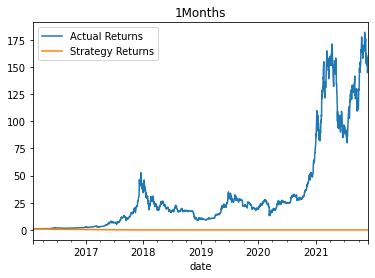

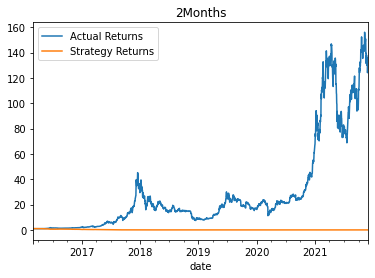

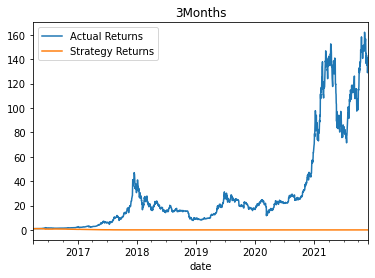

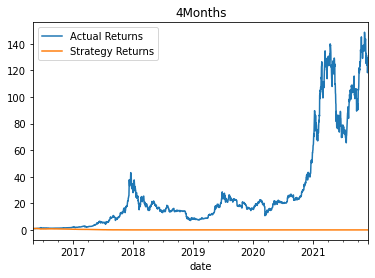

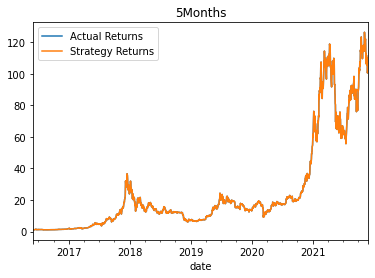

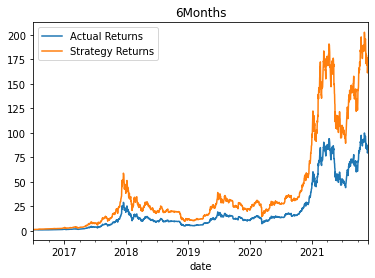

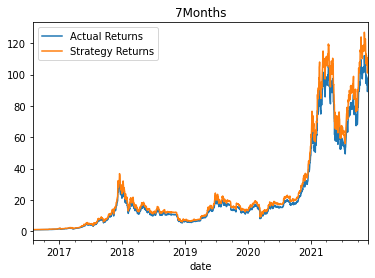

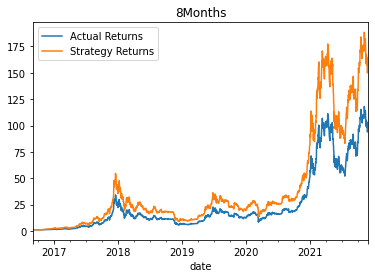

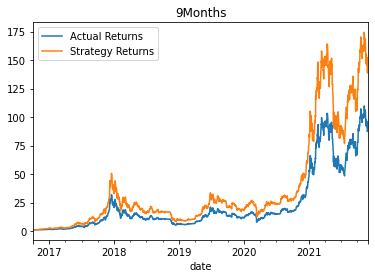

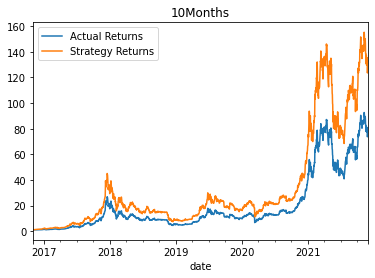

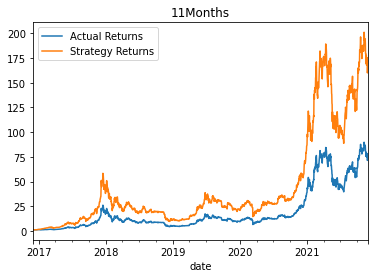

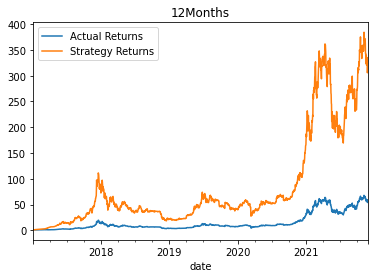

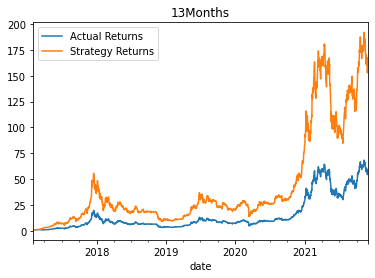

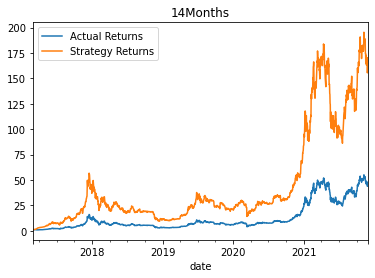

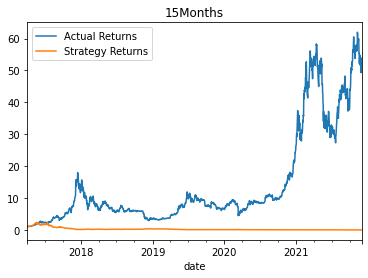

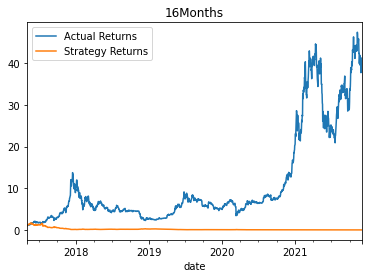

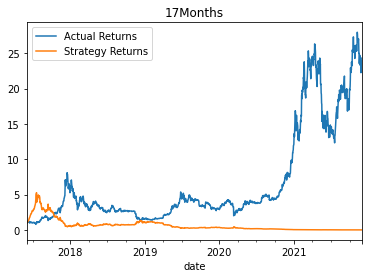

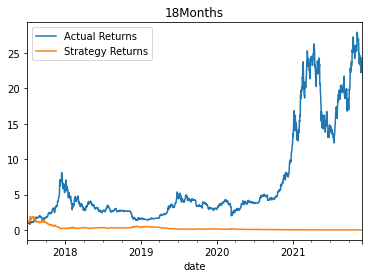

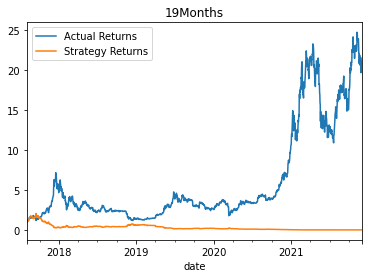

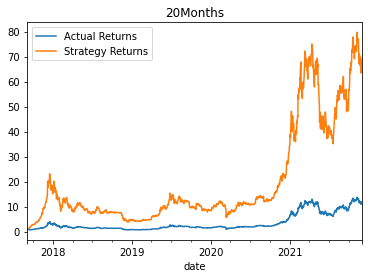

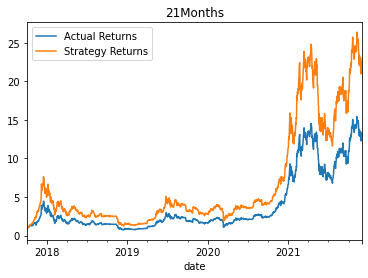

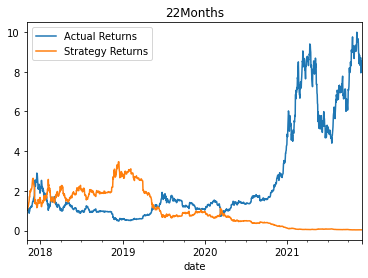

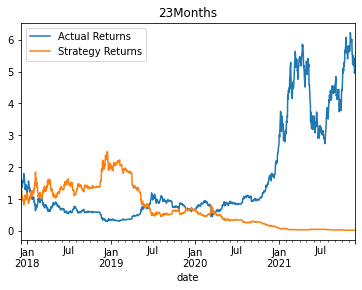

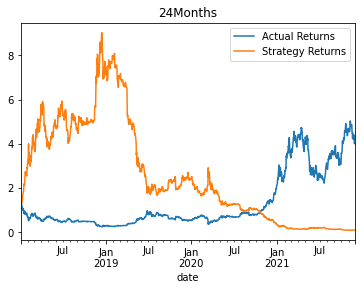

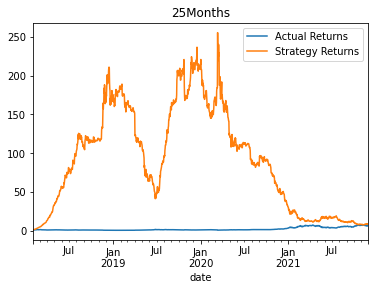

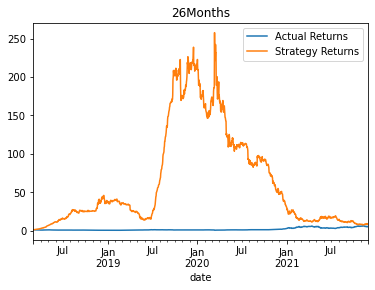

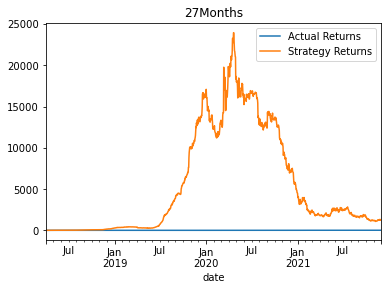

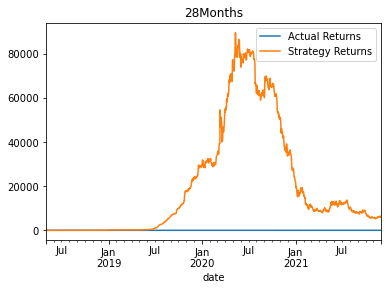

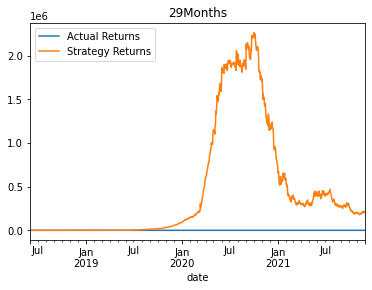

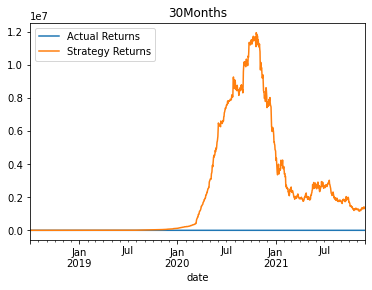

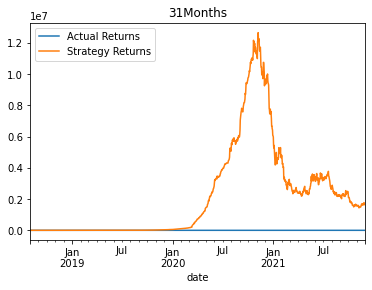

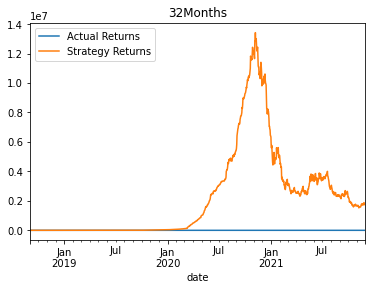

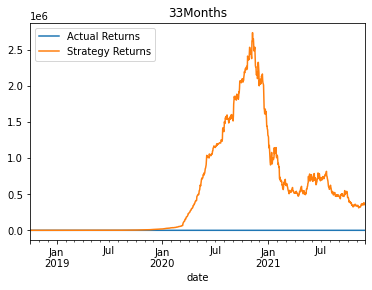

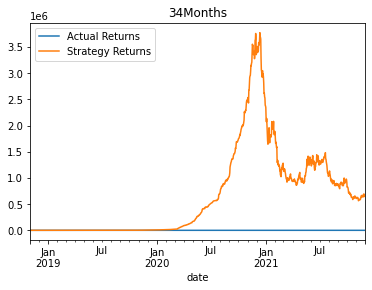

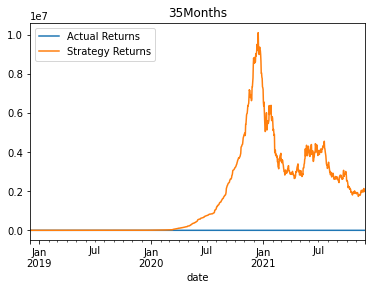

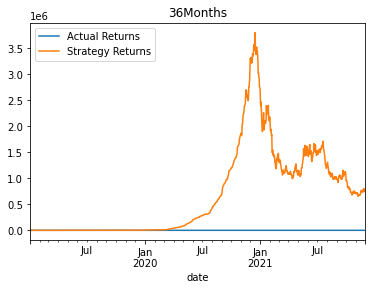

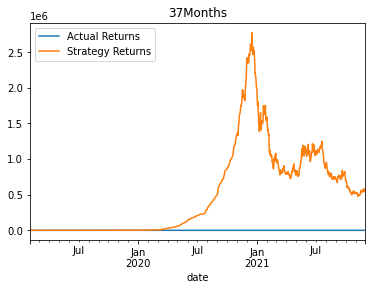

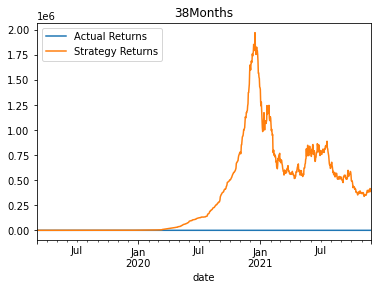

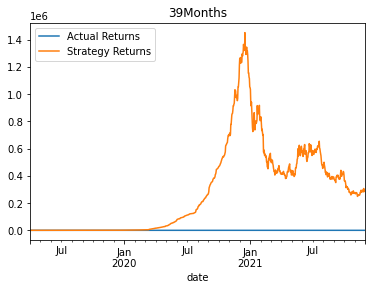

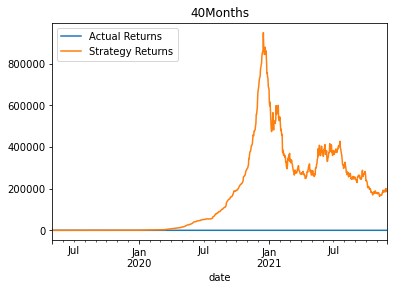

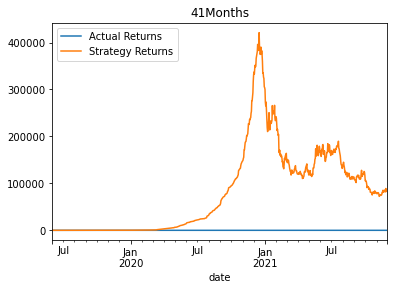

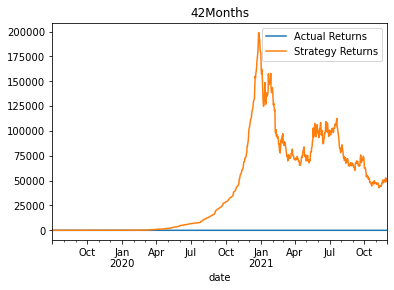

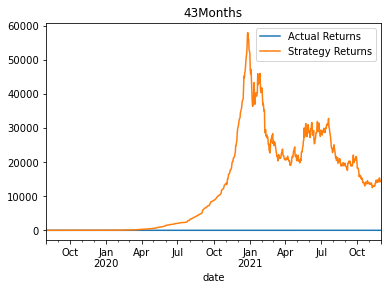

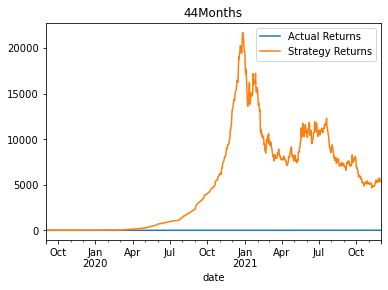

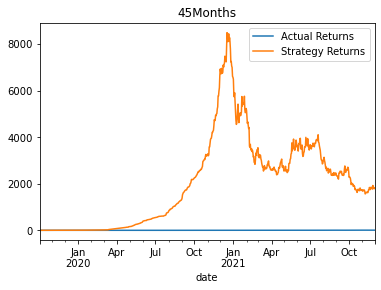

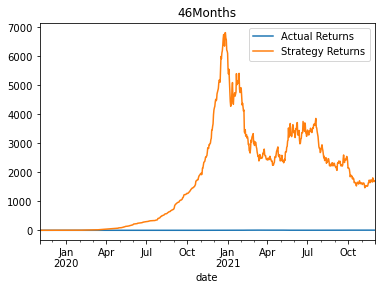

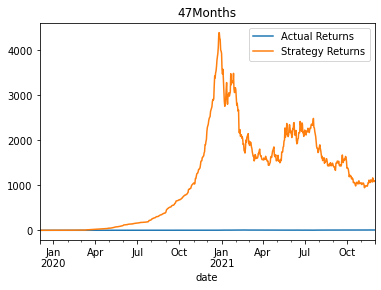

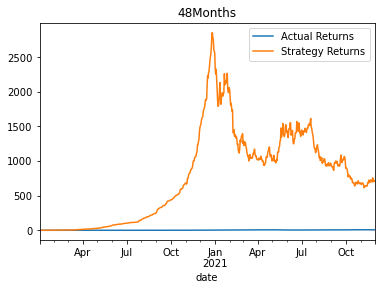

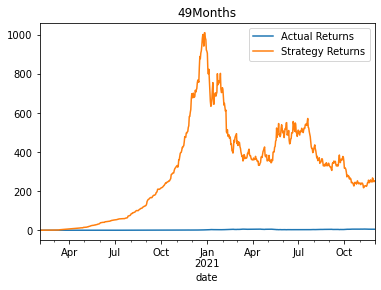

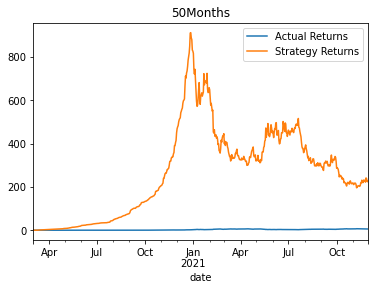

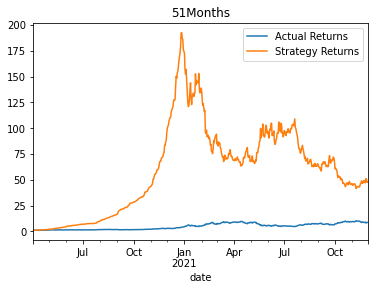

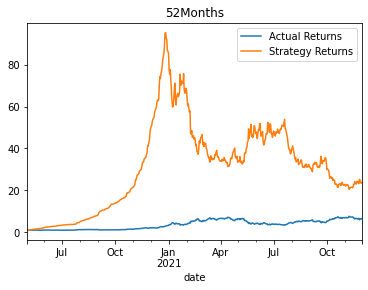

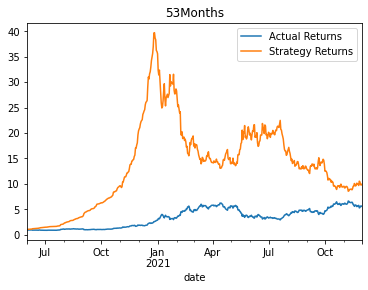

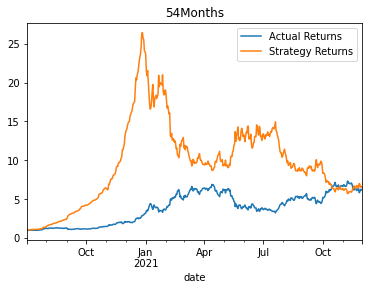

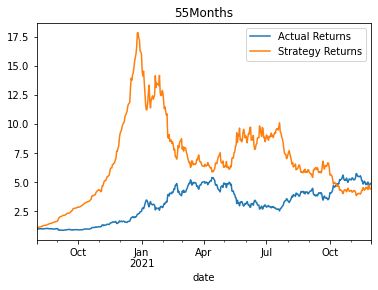

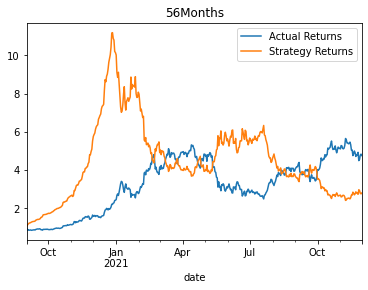

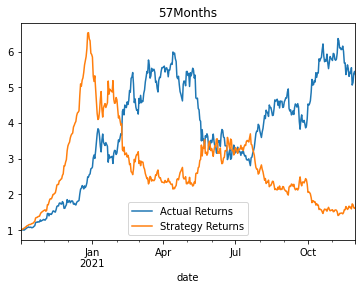

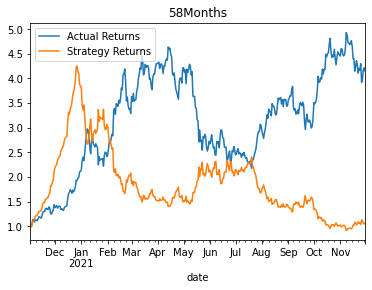

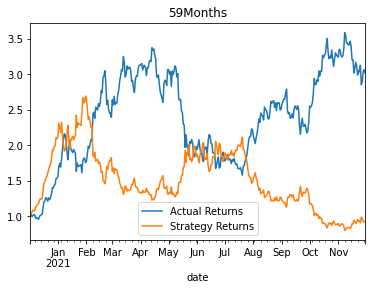

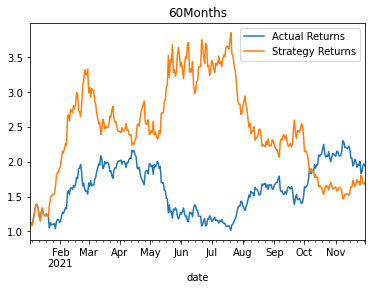

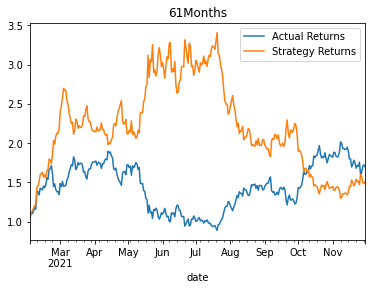

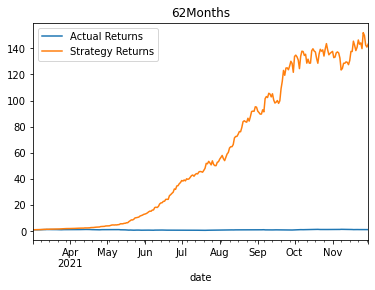

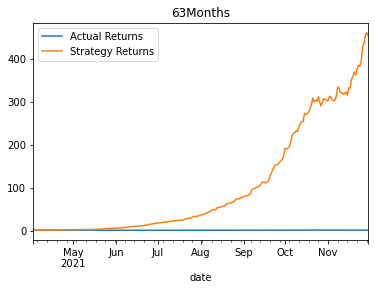

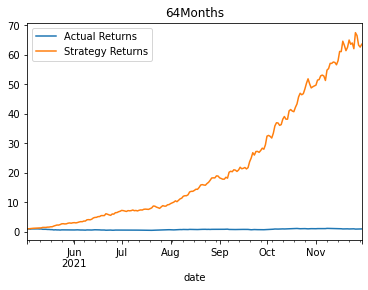

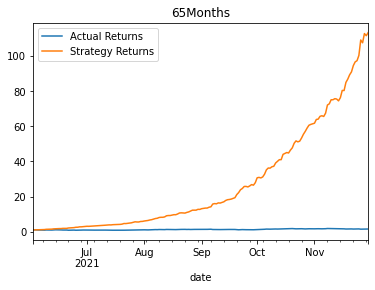

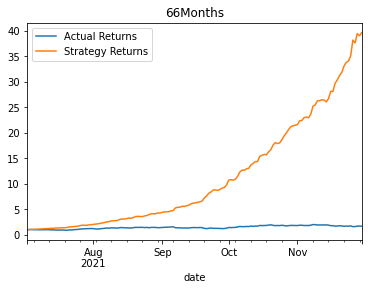

In [147]:
plot_maker(y, X,  list(range(1, 67)))